# PyTorch Computer vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/

##0. Computer vision libaries in PyTorch

* [`torchvision`] - base domain library for PyTorch computer vision

* `torchvision.datasets` - get datasets and data loading functions for computer vision here

* `torchvision.models` - get pretrained computer vision models that you can
leverage for your own problems

* `torchvision.transforms` - function for manipulating our vision data(images) to be
suitable for use with an ML model

* `torch.data.Dataset` = Base dataset class for PyTorch

* `torch.utils.data.DataLoader` - Create a python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from `torchvision.datasets`

In [ ]:
# Setup training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, #do we want to download yes/no?
    transform= ToTensor(),
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image,label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
print(class_names)
class_to_idx = train_data.class_to_idx
print(class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


### 1.2 Visualize our data

Image shape: ,torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

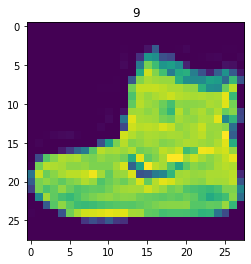

In [ ]:
image,label = train_data[0]
print(f"Image shape: ,{image.shape}")

plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

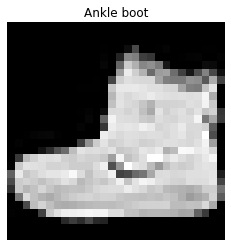

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

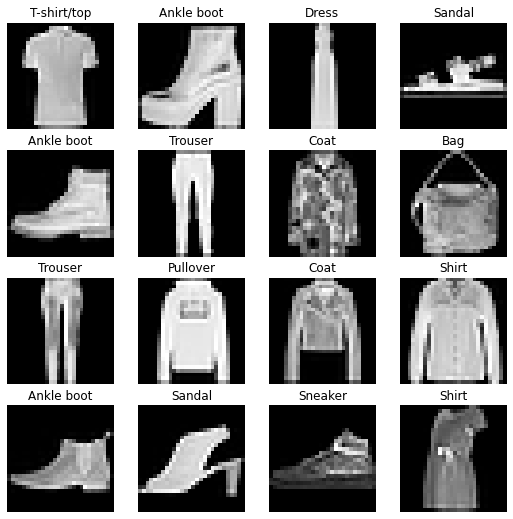

In [ ]:
# Plot more images
torch.manual_seed(128)
fig = plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



## 2. Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

DataLoader turn our dataset into a Python iterable.

More specificaly, we want to turn our data into batches(or mini batches)

Why would we do this?

1. It is more computationally efficient,as in our computing
hardware may not be able to look (store in memory) at 60000 images
in one hit. so we break it down to 32 images at a time(batch size of 32)

2. It gives our nural network more chances to update its gradient
per epoch.


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterable(batches)
train_dataloader = DataLoader(dataset= train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5fda5ff3d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5fda5ff370>)

In [ ]:
# Let's Check out what we've created
print(f"DataLoader:{train_dataloader,test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7f5fda5ff3d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f5fda5ff370>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_feature_batches,train_labels_batch = next(iter(train_dataloader))
train_feature_batches.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape:torch.Size([1, 28, 28])
Label: 4,label size:torch.Size([])


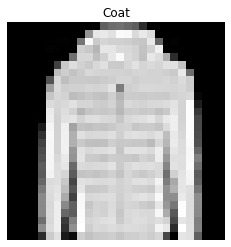

In [ ]:
# Show a sample
torch.manual_seed(128)
random_idx= torch.randint(0,len(train_feature_batches),size=[1]).item()
img,label = train_feature_batches[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image Shape:{img.shape}")
print(f"Label: {label},label size:{label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_feature_batches[0]
print(f"Before Flatten Shape of X:{x.shape}")

# Flatten the sample
output = flatten_model(x)
print(f"After Flatten shape of X:{output.shape}")

Before Flatten Shape of X:torch.Size([1, 28, 28])
After Flatten shape of X:torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
                 
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(128)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
    ).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.2361,  0.2060, -0.1029,  0.0581, -0.0777, -0.5363, -0.0377,  0.3085,
         -0.1129,  0.0097]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, Optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function will be
`nn.CrossEntropyLoss()`

* Optimizer - Our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problem,let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Dowload helper functions from Learn PyTorch repo
if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download ...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_function import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.001)

### 3.2 Creating a function to time our experiments

Machine Learning is very experimental

Two of the main things we'll often want to track are:

1. Model's perfomance(loss and accuracy values etc)

2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train Time on {device} : {total_time:.3f} secounds")
  return total_time


In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train Time on cpu : 0.000 secounds


3.493799999887415e-05

In [ ]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data .....
# Highlight that the optimizer will update a model's parameters once per batches rather than once per epoch.....

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epoch

2. Loop through training batches, perform training steps, calculate the train loss per batch.

3. Loop through testing batches, perform testing steps, calculate the test loss per batch.

4. Print out what's happening.

5. Time it all.

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the manual seed
torch.manual_seed(128)
train_time_start_on_cpu = timer()


# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}\n ---------")
  
  # Training 
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch,(x,y) in enumerate(train_dataloader):

    model_0.train()

    # 1. Forward pass
    y_pred = model_0(x)

    # 2. Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grade
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)} sample.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss,test_acc = 0,0

  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      # 1. Forword pass
      test_pred = model_0(x_test)

      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))


    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)
  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))
     

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
 ---------
Looked at 0/60000 sample.
Looked at 12800/60000 sample.
Looked at 25600/60000 sample.
Looked at 38400/60000 sample.
Looked at 51200/60000 sample.

Train loss: 1.9276 | Test loss: 1.5275, Test acc: 63.4485
Epoch :1
 ---------
Looked at 0/60000 sample.
Looked at 12800/60000 sample.
Looked at 25600/60000 sample.
Looked at 38400/60000 sample.
Looked at 51200/60000 sample.

Train loss: 1.2084 | Test loss: 1.0196, Test acc: 66.5136
Epoch :2
 ---------
Looked at 0/60000 sample.
Looked at 12800/60000 sample.
Looked at 25600/60000 sample.
Looked at 38400/60000 sample.
Looked at 51200/60000 sample.

Train loss: 0.9158 | Test loss: 0.8653, Test acc: 69.8982
Train Time on cpu : 56.318 secounds


## 4. Make prediction and get Model 0 results


In [ ]:
torch.manual_seed(128)
def eval_model_cpu(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """Return a dictionary containing the results of model predicting on data_loader."""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      #Make predictions
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the average loss/acc per batch
    loss /=len(data_loader)
    acc /= len(data_loader)
  
  return {"model_name":model.__class__.__name__, # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}


# Calculate model_0 result on test dataset
model_0_results = eval_model_cpu(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results
  

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.8653247356414795,
 'model_acc': 69.89816293929712}

## 5. Setup device agnostic-code(for using a GPU if there is one)

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a model with non-linearity

In [ ]:
# Create a model with non-linear and linear layers
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hiden_unit:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hiden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hiden_unit,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(128)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hiden_unit=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, Optimizer and evaluation metrics

In [ ]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)


In [ ]:
type(optimizer)

torch.optim.sgd.SGD

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:

* training loop - `train_step()`

* testing loop - `test_step()`

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device):
  """Perform a training with model trying to learn on data_loader."""

  train_loss,train_acc= 0,0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch,(x,y) in enumerate(data_loader):

    # Send the data to the target device
    x,y = x.to(device),y.to(device)

    # 1. Forward pass
    y_pred = model(x)

    # 2. Calculate loss and accuracy(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc +=accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grade
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """ Perform a testing loop step on model going over data_loader."""
  ## Testing
  test_loss,test_acc = 0,0

  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:

      # Send the data to the target device
      x,y = x.to(device),y.to(device)

      # 1. Forword pass
      test_pred = model(x)

      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred,y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))


    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch
    test_acc /= len(data_loader)

  # Print out what's happening
  print(f"\nTest loss: {train_loss:.4f} | Test acc: {test_acc:.4f}%")

In [ ]:
from torch.cuda import device_of
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the manual seed
torch.manual_seed(128)
train_time_start_on_gpu = timer()


# Set the number of epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}\n ---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                 end=train_time_end_on_gpu,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
 ---------
Train loss: 1.65562 | Train acc: 45.51%

Test loss: 0.9158 | Test acc: 48.1130%
Epoch :1
 ---------
Train loss: 1.41444 | Train acc: 49.42%

Test loss: 0.9158 | Test acc: 48.8419%
Epoch :2
 ---------
Train loss: 1.36092 | Train acc: 50.36%

Test loss: 0.9158 | Test acc: 49.9002%
Train Time on cuda : 50.396 secounds


**Note:** Sometimes,depending on our data/hardware you might find that
our model trains faster on CPU than GPU

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU

2. The hardware we are using has a better CPU in terms compute capability than the GPU

For more on how to make our models compute faster,see here: https://horace.io/brrr_intro.html

In [ ]:
def eval_model_gpu(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device):
  """Return a dictionary containing the results of model predicting on data_loader."""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:

      # Send the data to the target device
      x,y = x.to(device),y.to(device)

      #Make predictions
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the average loss/acc per batch
    loss /=len(data_loader)
    acc /= len(data_loader)
  
  return {"model_name":model.__class__.__name__, # only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}
# Get model_1 results dictionary
model_1_results = eval_model_gpu(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.3657838106155396,
 'model_acc': 49.900159744408946}

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

## 7. Model 2: Building a Convolution Neural Network(CNN)

In [ ]:
# Create a convolution neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicat the TinyVGG
  model from CNN explainer website.
  """

  def __init__(self,
               input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=490,
                  out_features=output_shape)
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
torch.manual_seed(128)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_unit=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(128)

# Create a batch of image
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape:{images.shape}")
print(f"single image shape: {test_image.shape}")

Image batch shape:torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])


In [ ]:
torch.manual_seed(128)
# Create a single conv2d layer
convlayer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)
# Pass the data through the convolution layer
conv_output = convlayer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = convlayer(test_image.unsqueeze(dim=0))
print(f"Shape after going through convlayer(): {test_image_through_conv.shape}")
# Pass data through just the conv_layer
test_image_through_maxlayer = max_pool_layer(test_image)
print(f"Shape after going through max_pool_layer(): {test_image_through_maxlayer.shape}")



Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through convlayer(): torch.Size([1, 10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([3, 32, 32])


In [ ]:
torch.manual_seed(128)
# Create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor}")
print(f"Max Pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[ 1.5682, -1.6150],
          [ 0.4513,  0.4489]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[1.5682]]]])
Max Pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
# Create a random tensor for our tiny vgg model
random_tensor_image = torch.randn(size=(1,28,28))
random_tensor_image.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(random_tensor_image.unsqueeze(dim=0).to(device))

tensor([[-0.0398, -0.0471,  0.0038, -0.0464,  0.0060,  0.0647, -0.0844, -0.0230,
          0.0140, -0.0300]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

### 7.4 Training and testing `model_2` using our training and test function

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the manual seed
torch.manual_seed(128)
train_time_start_on_gpu = timer()

# Set the number of epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}\n ---------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                 end=train_time_end_on_gpu,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
 ---------
Train loss: 1.20502 | Train acc: 56.28%

Test loss: 0.9158 | Test acc: 78.7939%
Epoch :1
 ---------
Train loss: 0.49509 | Train acc: 81.88%

Test loss: 0.9158 | Test acc: 83.4565%
Epoch :2
 ---------
Train loss: 0.42833 | Train acc: 84.36%

Test loss: 0.9158 | Test acc: 85.2037%
Train Time on cuda : 56.558 secounds


In [ ]:
# Get model_2 results dictionary
model_2_results = eval_model_gpu(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.41858524084091187,
 'model_acc': 85.20367412140575}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.865325,69.898163
1,FashionMNISTModelV1,1.365784,49.900160
2,FashionMNISTModelV2,0.418585,85.203674


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.865325,69.898163,56.318346
1,FashionMNISTModelV1,1.365784,49.900160,50.396113
2,FashionMNISTModelV2,0.418585,85.203674,56.557525


Text(0, 0.5, 'model')

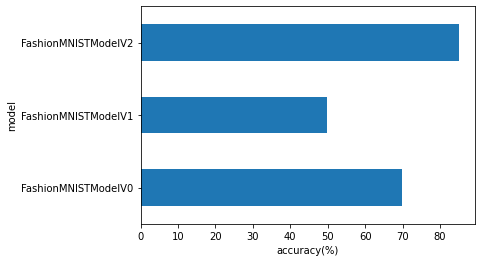

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random prediction with best model


In [ ]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device):
  pred_probs = []
  model.to(device)
  with torch.inference_mode():
    for sample in data:

      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability(logit -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensr
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(128)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)


# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

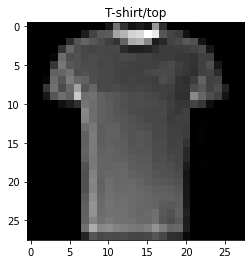

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_prediction(model=model_2,
                              data=test_samples,
                              device=device)
 

# View first two prediction probabilities
pred_probs[:2]

tensor([[9.5068e-01, 1.8375e-04, 2.6430e-03, 4.2106e-03, 2.6346e-04, 6.7913e-07,
         4.1626e-02, 7.8104e-08, 3.8798e-04, 1.6478e-08],
        [8.3791e-01, 1.3755e-04, 2.3121e-02, 6.7293e-03, 8.8179e-05, 1.2794e-07,
         1.3170e-01, 6.5583e-09, 3.1658e-04, 3.0513e-09]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 0, 8, 1, 3, 4, 4, 3, 4])

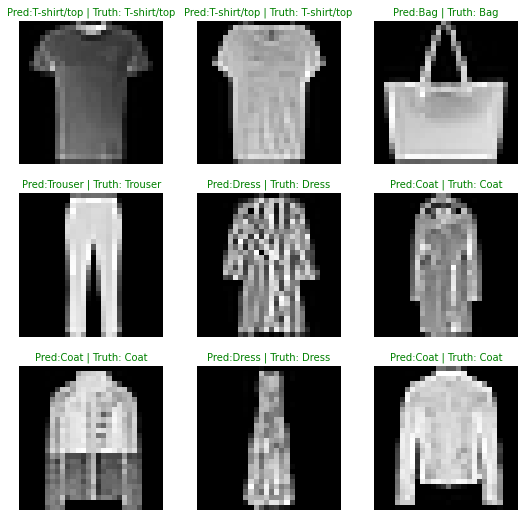

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows,ncols = 3,3
for i,sample in enumerate(test_samples):

  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred:{pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c ="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

  plt.axis("off")

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating our classification models visualy

1. Make prediction with our trained model on the test dataset

2. Make a confusion matrix `torchmetrics.ConfusionMatrix` 

3. Plot the confusion matix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
from tqdm.auto import tqdm

# Make prediction with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc= "Making prediction...."):

    # Send the data and targets to target device
    x,y = x.to(device),y.to(device)

    # Do the forward pass
    y_logits = model_2(x)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    # Put prediction on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of prediction into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# See if required packages are installed and if not, install them.....
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >=19,"mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mixtend version: {mlxtend.__version__}")
  pass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
mixtend version: 0.21.0


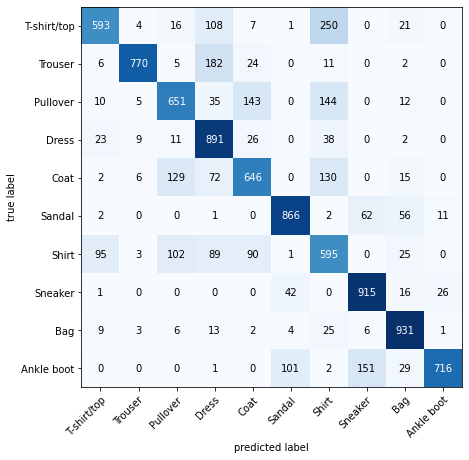

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusin instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


# 3. Plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[593,   4,  16, 108,   7,   1, 250,   0,  21,   0],
        [  6, 770,   5, 182,  24,   0,  11,   0,   2,   0],
        [ 10,   5, 651,  35, 143,   0, 144,   0,  12,   0],
        [ 23,   9,  11, 891,  26,   0,  38,   0,   2,   0],
        [  2,   6, 129,  72, 646,   0, 130,   0,  15,   0],
        [  2,   0,   0,   1,   0, 866,   2,  62,  56,  11],
        [ 95,   3, 102,  89,  90,   1, 595,   0,  25,   0],
        [  1,   0,   0,   0,   0,  42,   0, 915,  16,  26],
        [  9,   3,   6,  13,   2,   4,  25,   6, 931,   1],
        [  0,   0,   0,   1,   0, 101,   2, 151,  29, 716]])

## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "0.3_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/0.3_pytorch_computer_vision_model_2.pth


In [ ]:
# Craete a new instance
torch.manual_seed(128)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_unit=10,
                                     output_shape=len(class_names))


# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Save the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.41858524084091187,
 'model_acc': 85.20367412140575}

In [ ]:
# Evaluate loaded model
torch.manual_seed(128)

loaded_model_2_results = eval_model_gpu(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.41858524084091187,
 'model_acc': 85.20367412140575}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)